In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import csv
import seaborn as sns
sns.set(style='whitegrid')
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['figure.dpi'] = 200

C:\Users\Ajinkya\anaconda3\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [18]:
def get_oil_prices(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

In [3]:
symbol = "CL=F"  # Symbol for Crude Oil (Futures)
start_date = "2001-01-01"
end_date = "2024-02-01"

oil_prices_data = get_oil_prices(symbol, start_date, end_date)
oil_prices_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,27.250000,27.400000,26.600000,27.200001,27.200001,52321
2001-01-03,27.230000,28.139999,27.049999,27.950001,27.950001,66628
2001-01-04,28.200001,28.780001,27.850000,28.200001,28.200001,74383
2001-01-05,28.150000,28.799999,27.799999,28.000000,28.000000,63852
2001-01-08,28.200001,28.400000,27.150000,27.350000,27.350000,76058
...,...,...,...,...,...,...
2024-01-25,75.300003,77.510002,75.160004,77.360001,77.360001,320177
2024-01-26,77.150002,78.260002,76.059998,78.010002,78.010002,365456
2024-01-29,78.900002,79.290001,76.410004,76.779999,76.779999,331925


In [8]:
if not oil_prices_data.empty:
    filename = "C:/Users/Ajinkya/Desktop/Excelr_DS_Course/Project/P-355(FORECASTING)/oil_prices_yahoo.csv"
    oil_prices_data.to_csv(filename, index=True)
    print(f"Data saved to '{filename}' successfully.")
else:
    print("Failed to fetch data.")

Data saved to 'C:/Users/Ajinkya/Desktop/Excelr_DS_Course/Project/P-355(FORECASTING)/oil_prices_yahoo.csv' successfully.


In [3]:
df=pd.read_csv('C:/Users/Ajinkya/Desktop/Excelr_DS_Course/Project/P-355(FORECASTING)/oil_prices_yahoo.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,27.250000,27.400000,26.600000,27.200001,27.200001,52321
1,2001-01-03,27.230000,28.139999,27.049999,27.950001,27.950001,66628
2,2001-01-04,28.200001,28.780001,27.850000,28.200001,28.200001,74383
3,2001-01-05,28.150000,28.799999,27.799999,28.000000,28.000000,63852
4,2001-01-08,28.200001,28.400000,27.150000,27.350000,27.350000,76058
...,...,...,...,...,...,...,...
5791,2024-01-25,75.300003,77.510002,75.160004,77.360001,77.360001,320177
5792,2024-01-26,77.150002,78.260002,76.059998,78.010002,78.010002,365456
5793,2024-01-29,78.900002,79.290001,76.410004,76.779999,76.779999,331925
5794,2024-01-30,77.019997,78.139999,75.849998,77.820000,77.820000,347242


In [4]:
#Selecting Required Columns
oil=df[['Date','Adj Close']]


In [5]:
oil

,Date,Adj Close
0,2001-01-02,27.200001
1,2001-01-03,27.950001
2,2001-01-04,28.200001
3,2001-01-05,28.000000
4,2001-01-08,27.350000
...,...,...
5791,2024-01-25,77.360001
5792,2024-01-26,78.010002
5793,2024-01-29,76.779999
5794,2024-01-30,77.820000


In [6]:
# Renaming The Column
oil.rename(columns={"Adj Close":"Price"},inplace=True)

In [7]:
# Change the index of the oil as Date index
oil.set_index('Date', inplace=True)

In [8]:
oil.head()

,Price
Date,
2001-01-02,27.200001
2001-01-03,27.950001
2001-01-04,28.200001
2001-01-05,28.000000
2001-01-08,27.350000


In [13]:
oil.index = pd.to_datetime(oil.index)

In [14]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5796 entries, 2001-01-02 to 2024-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   5796 non-null   float64
dtypes: float64(1)
memory usage: 90.6 KB


In [15]:
#oil['Date']=pd.to_datetime(oil['Date'])
oil.describe()

,Price
count,5796.000000
mean,64.709055
std,25.309045
min,-37.630001
25%,45.720001
50%,63.004999
75%,84.062502
max,145.289993


In [16]:
oil.isnull().sum()

Price    0
dtype: int64

In [17]:
oil.dtypes

Price    float64
dtype: object

Text(0, 0.5, 'Price')

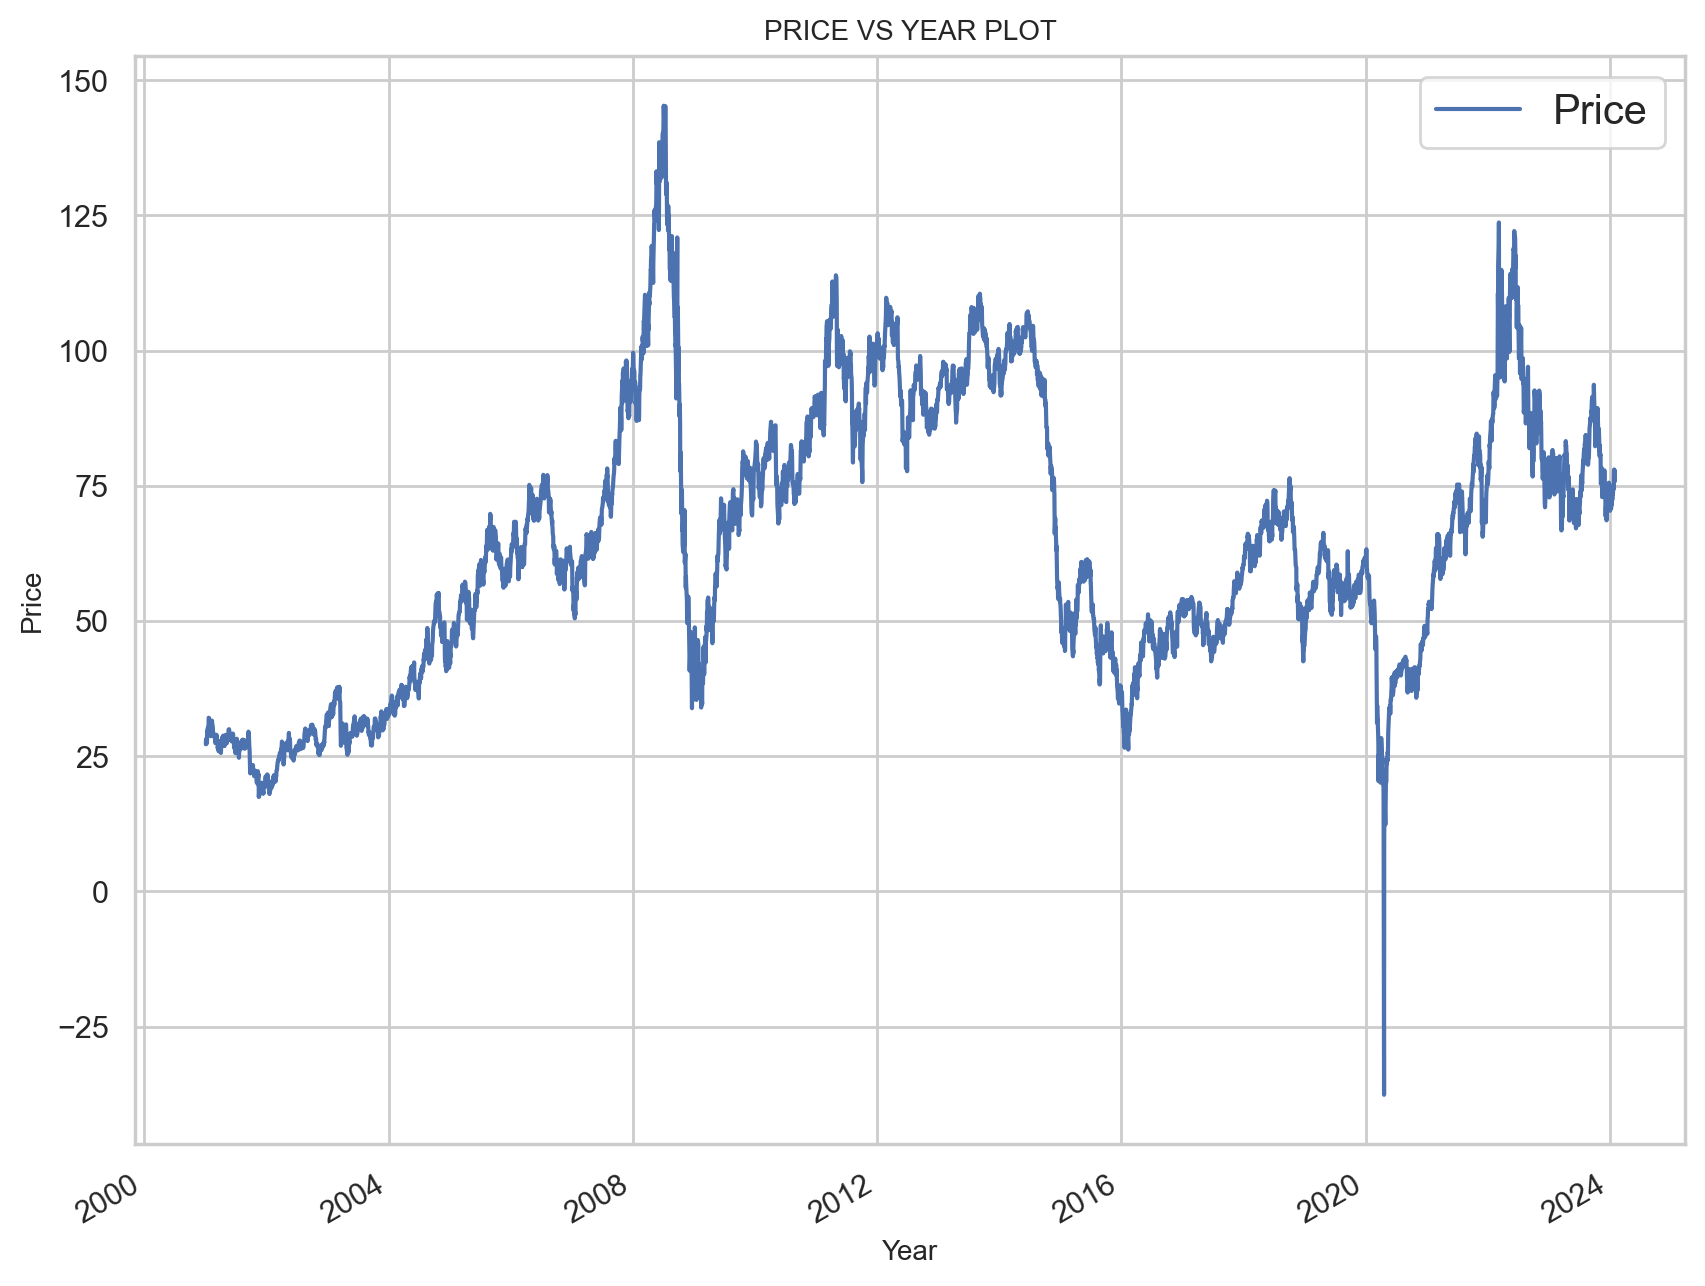

In [18]:
oil.plot(grid=True)
plt.legend(fontsize=15)
plt.title("PRICE VS YEAR PLOT",fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Price",fontsize=10)

(0.0, 150.0)

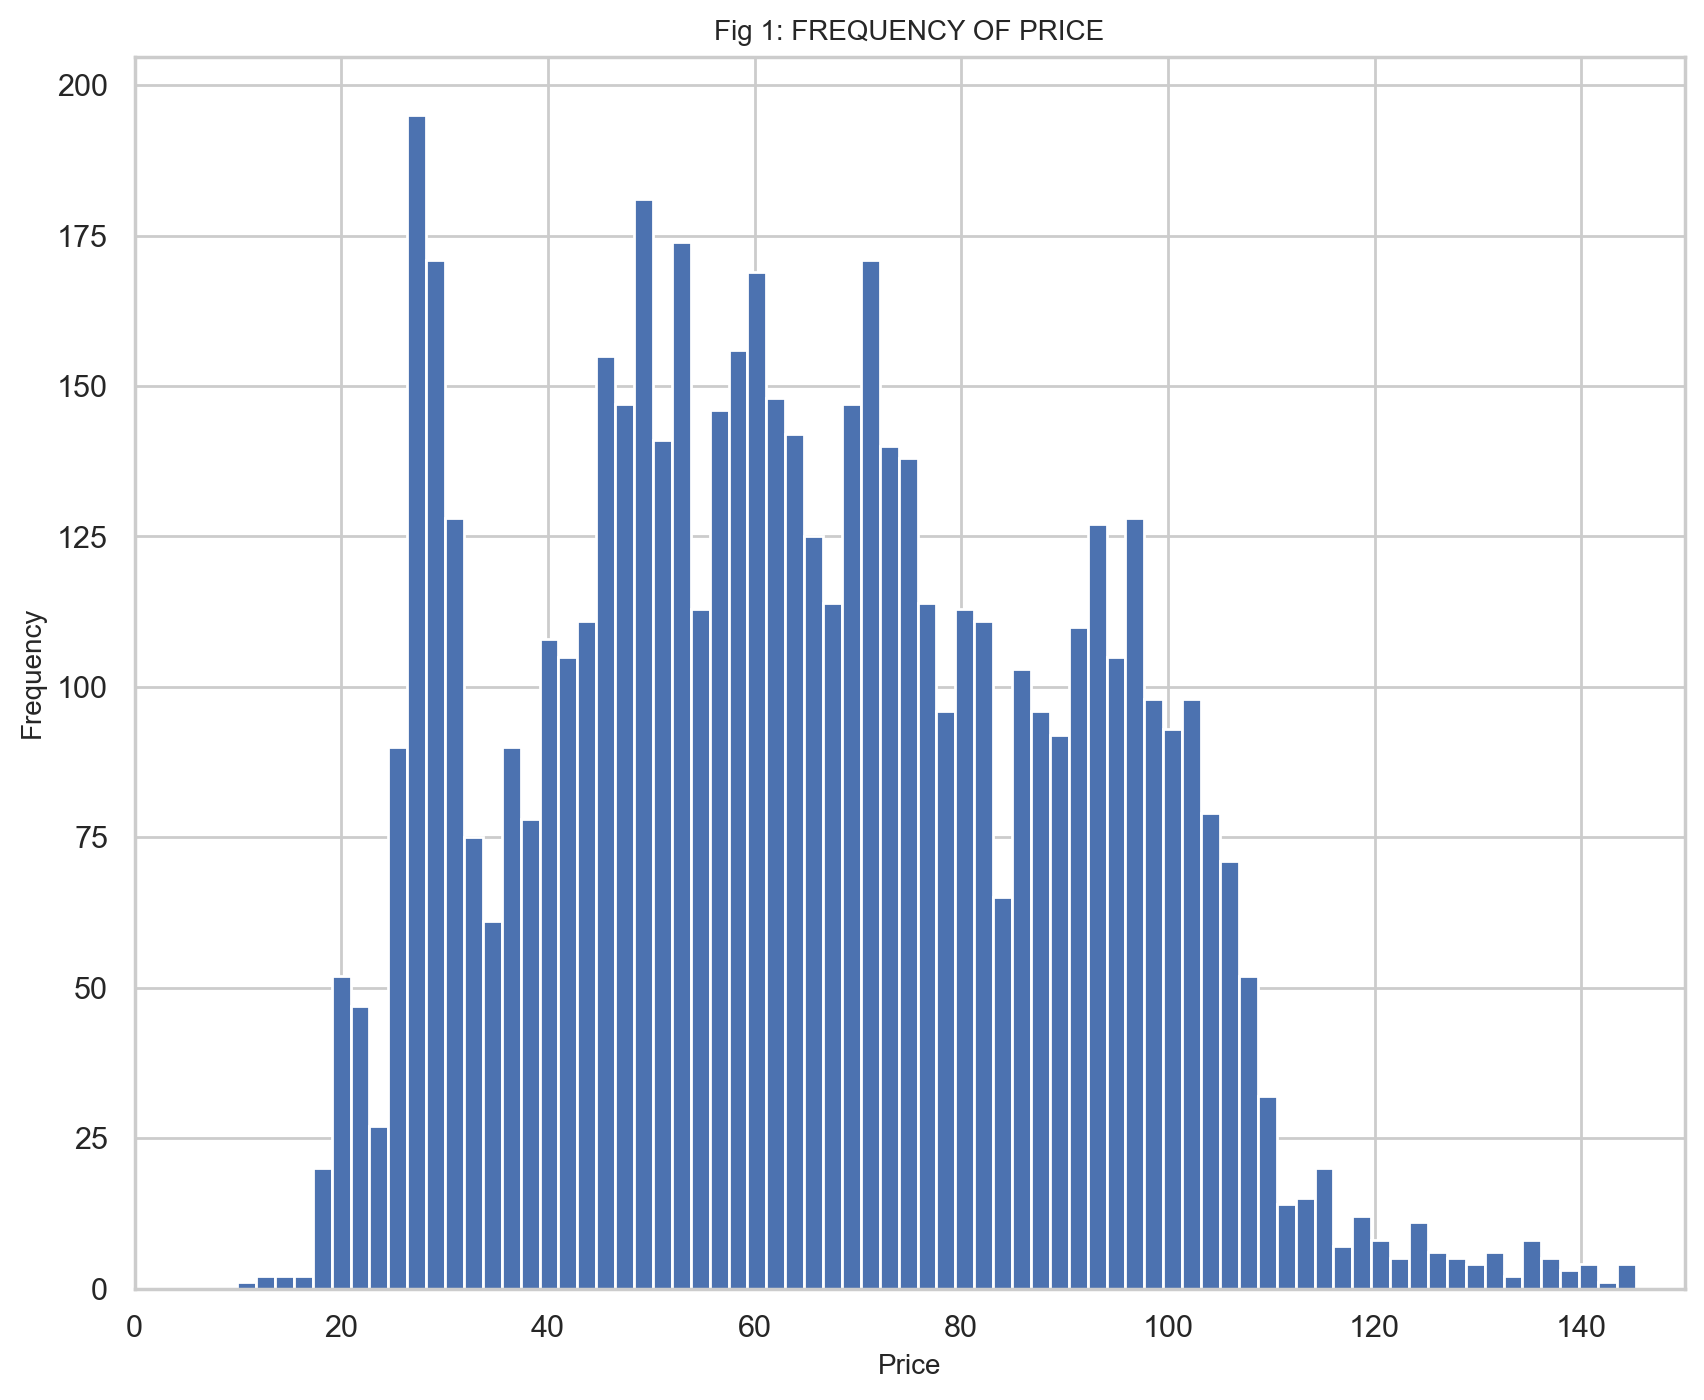

In [33]:
plt.hist(oil['Price'],bins=100)
plt.title("Fig 1: FREQUENCY OF PRICE",fontsize=10)
plt.xlabel("Price", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.xlim([0,150])

(-0.3, 0.3)

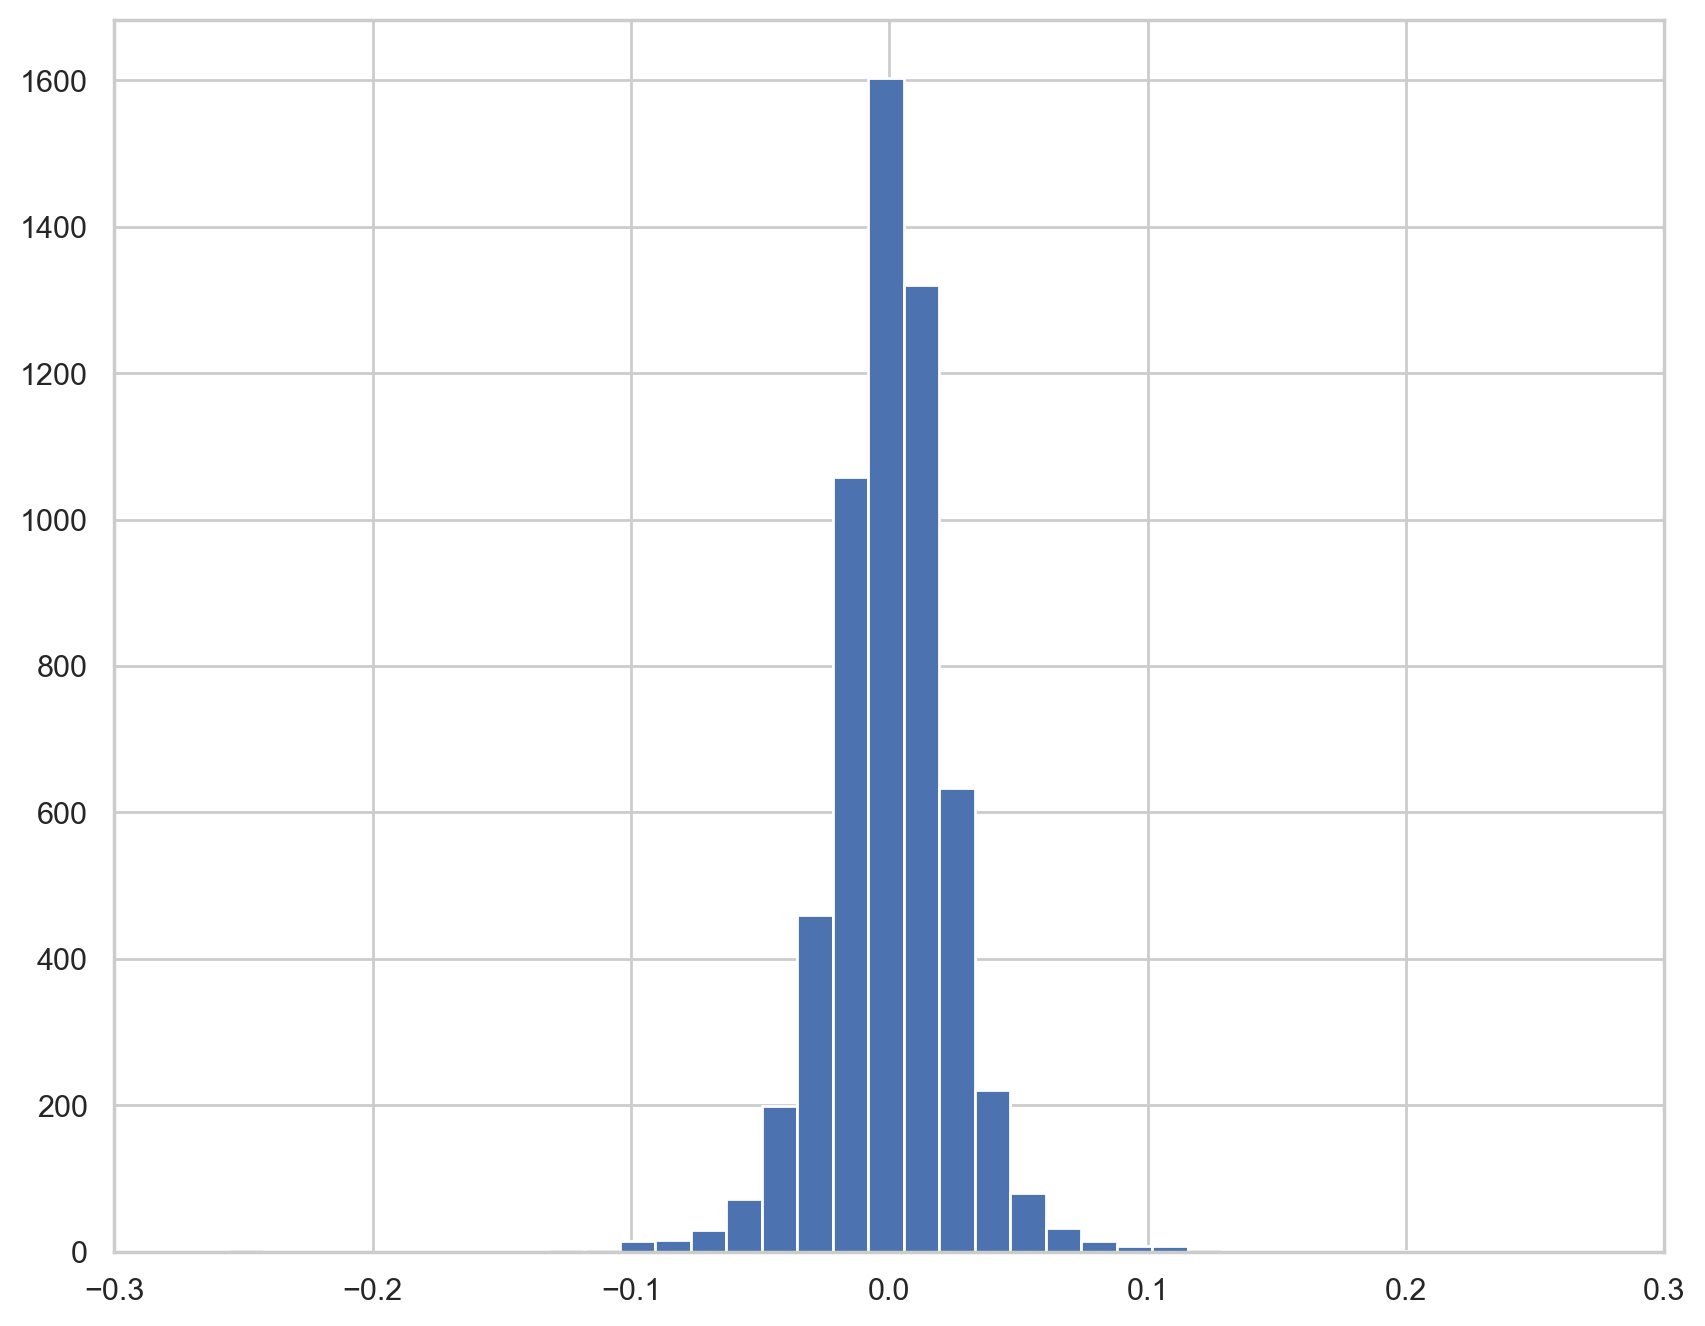

In [20]:
# Daily Percentage Change
pct_oil=oil['Price'].pct_change()
pct_oil.hist(bins=250)
plt.xlim([-0.3,0.3])

In [21]:
# Adding week, months and year columns to the dataframe
oil['no_week'] = oil.index.week
oil['no_month'] = oil.index.month
oil['year'] = oil.index.year

In [22]:
oil

,Price,no_week,no_month,year
Date,,,,
2001-01-02,27.200001,1,1,2001
2001-01-03,27.950001,1,1,2001
2001-01-04,28.200001,1,1,2001
2001-01-05,28.000000,1,1,2001
2001-01-08,27.350000,2,1,2001
...,...,...,...,...
2024-01-25,77.360001,4,1,2024
2024-01-26,78.010002,4,1,2024
2024-01-29,76.779999,5,1,2024


Text(0, 0.5, 'Price)')

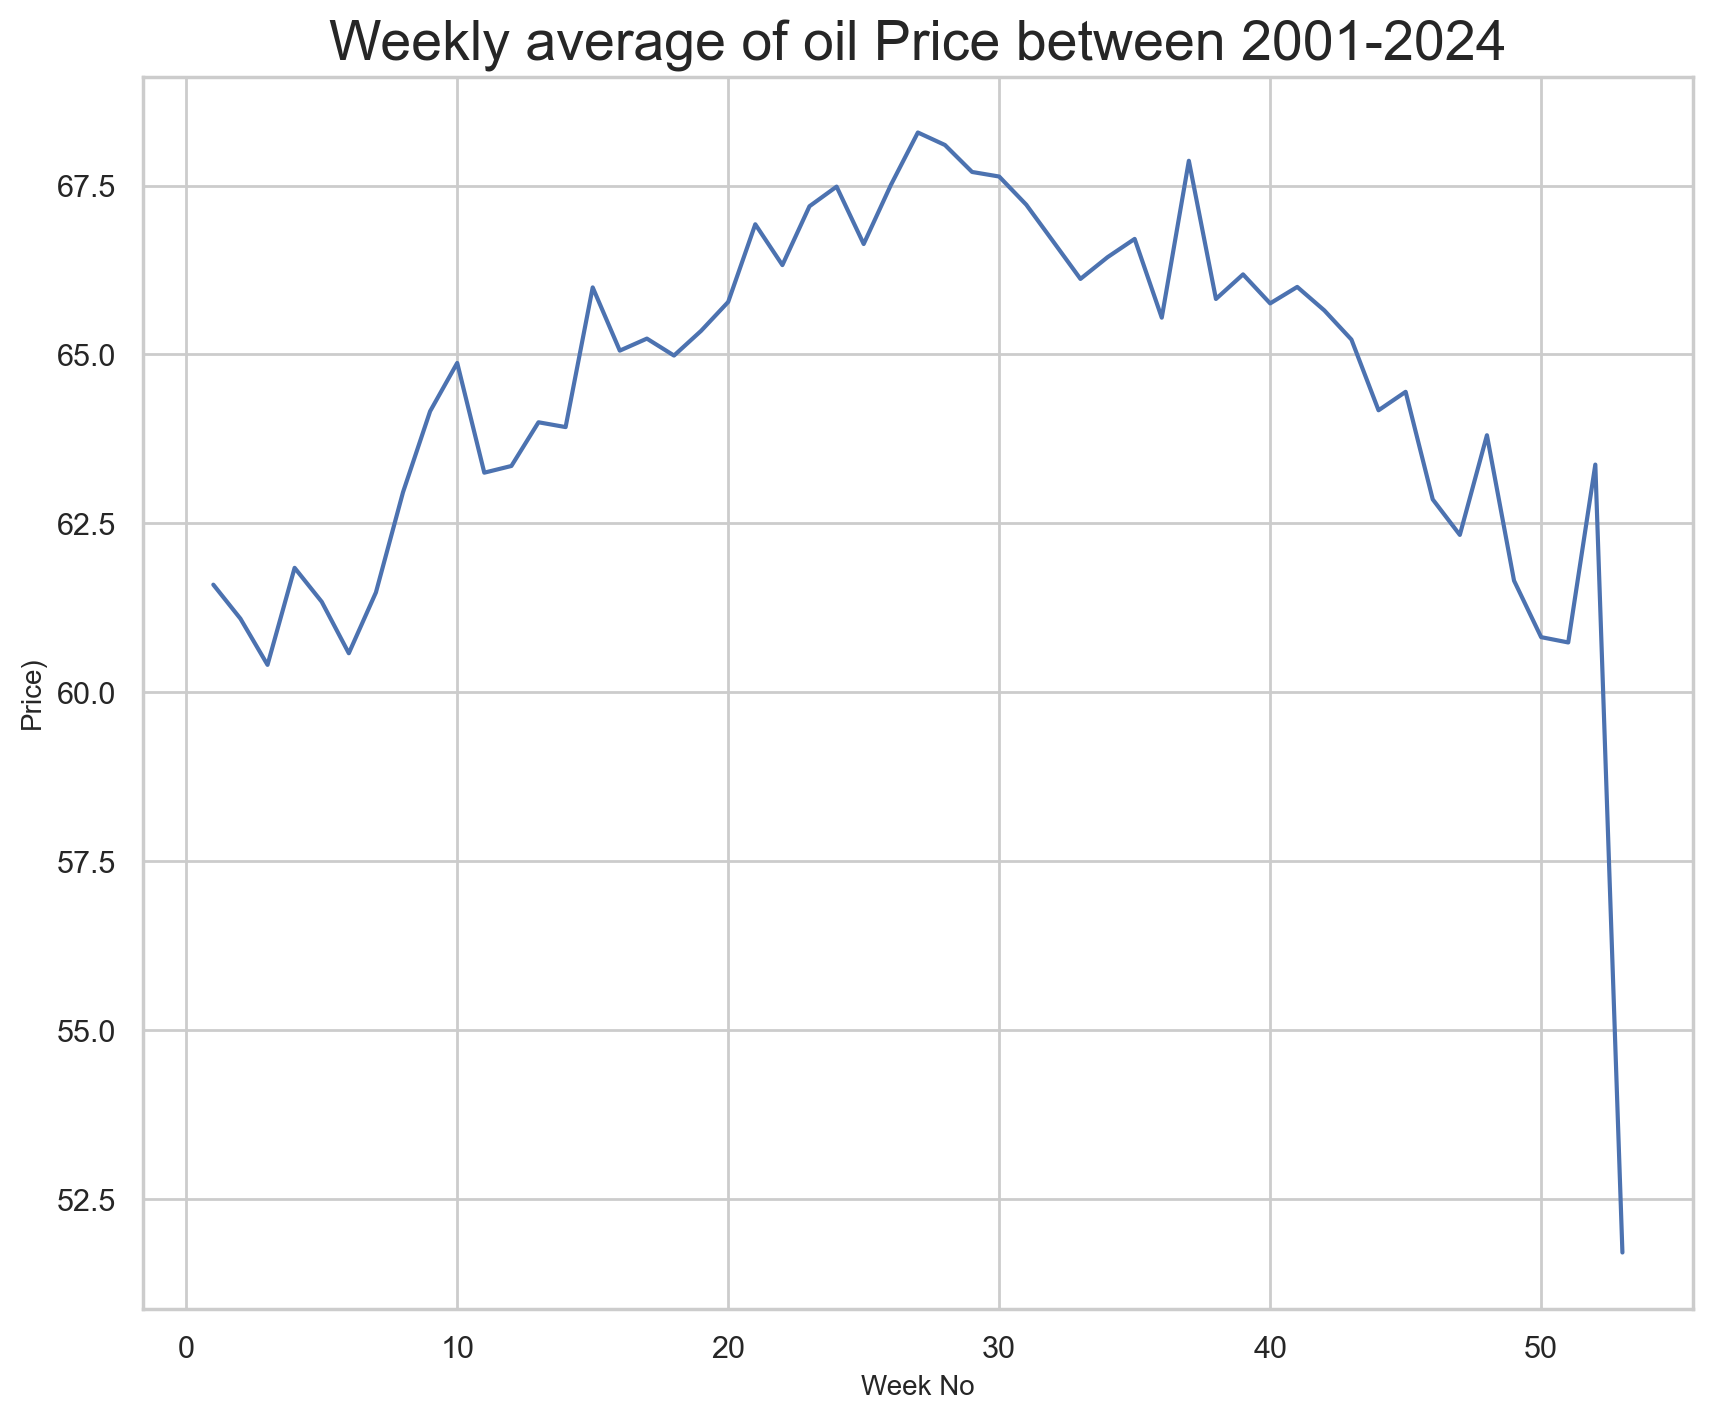

In [28]:
# Grouping by weeks to determine weekly average
# Grouping by weeks and plotting the mean
plt.plot(oil.groupby('no_week')['Price'].mean())
plt.title("Weekly average of oil Price between 2001-2024",fontsize=20)
plt.xlabel("Week No", fontsize=10)
plt.ylabel("Price)",fontsize=10)

Text(0, 0.5, 'Price)')

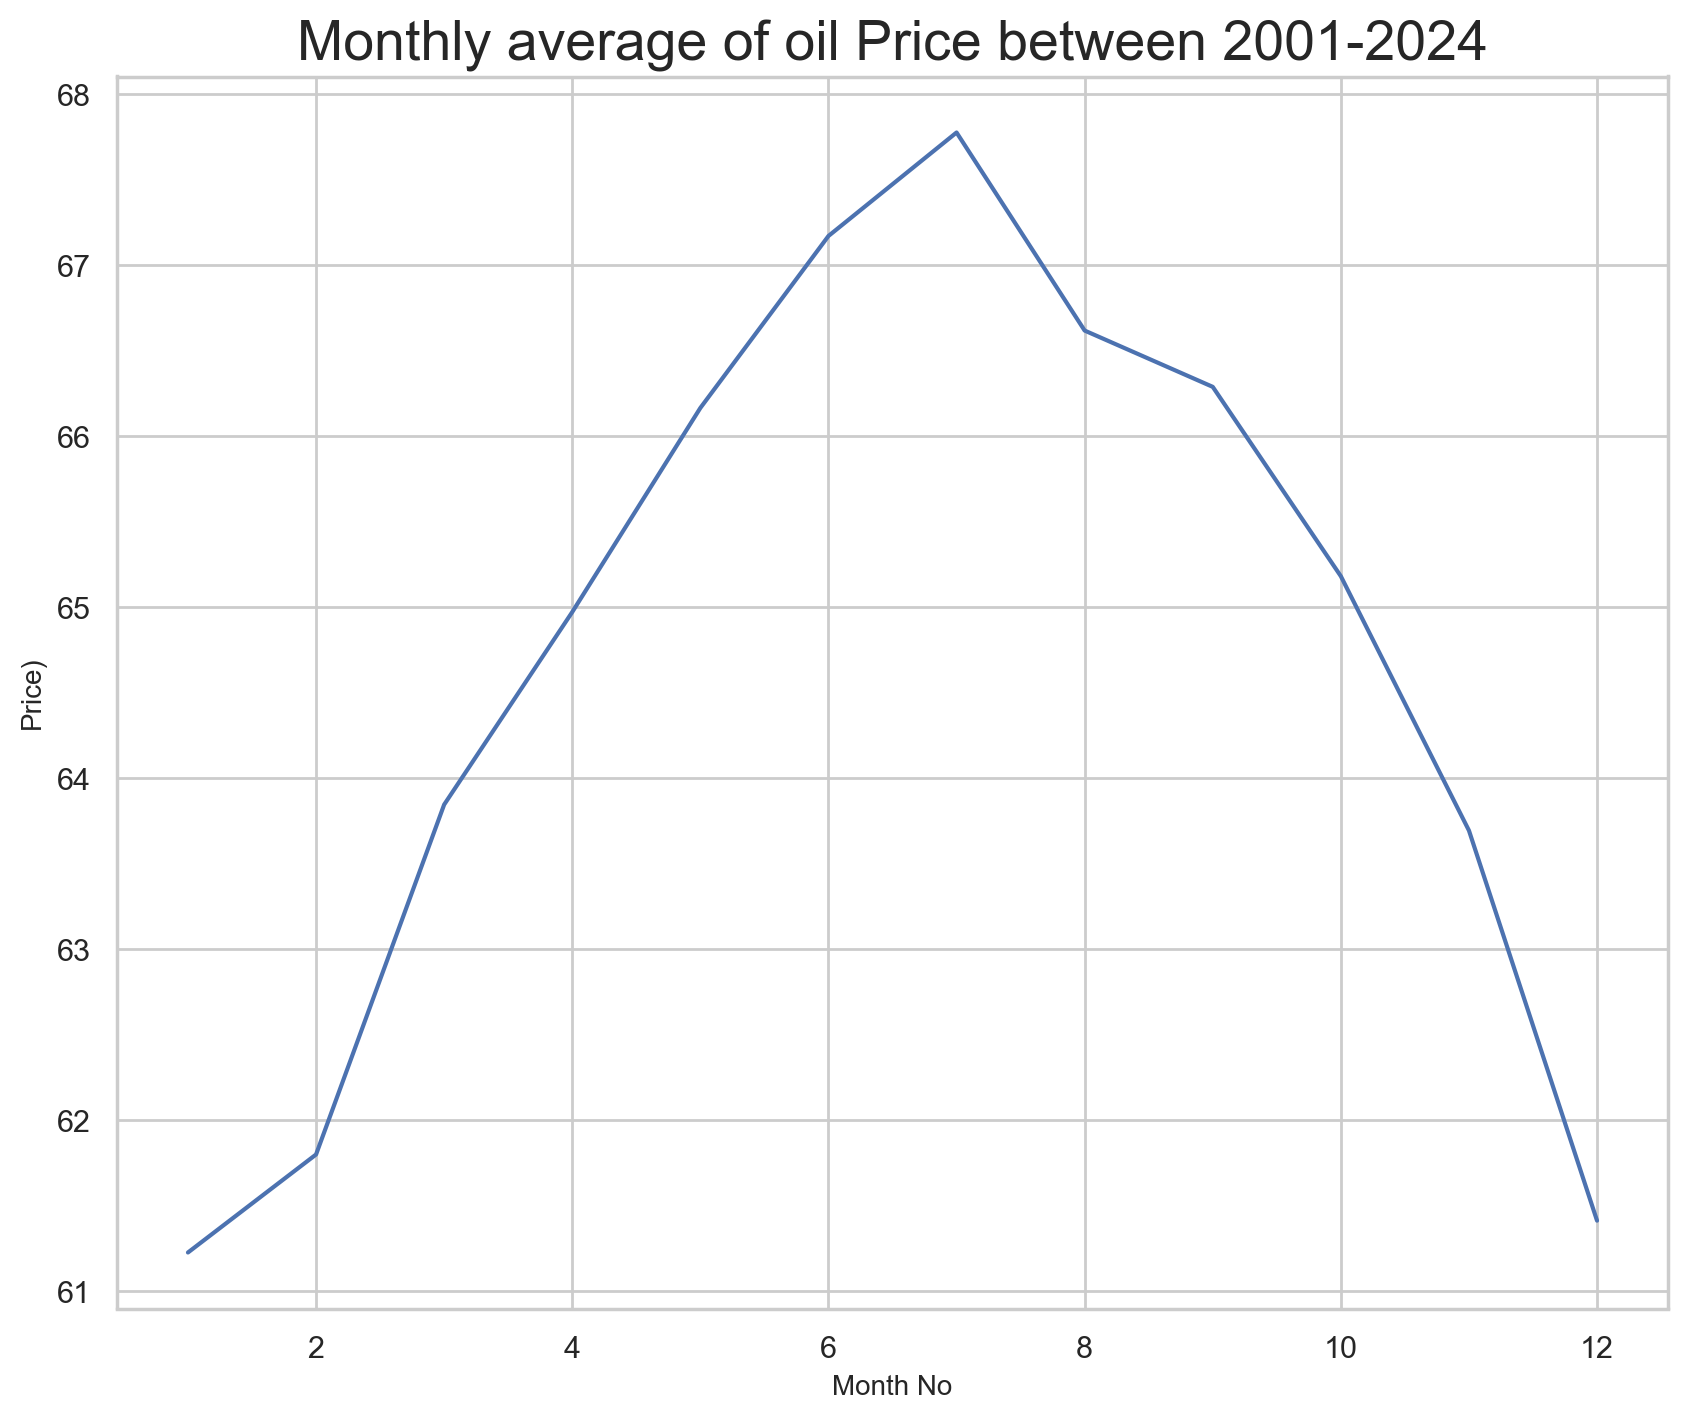

In [29]:
# Grouping by Months and plotting the mean
plt.plot(oil.groupby('no_month')['Price'].mean())
plt.title("Monthly average of oil Price between 2001-2024",fontsize=20)
plt.xlabel("Month No", fontsize=10)
plt.ylabel("Price)",fontsize=10)

Text(0, 0.5, 'Price)')

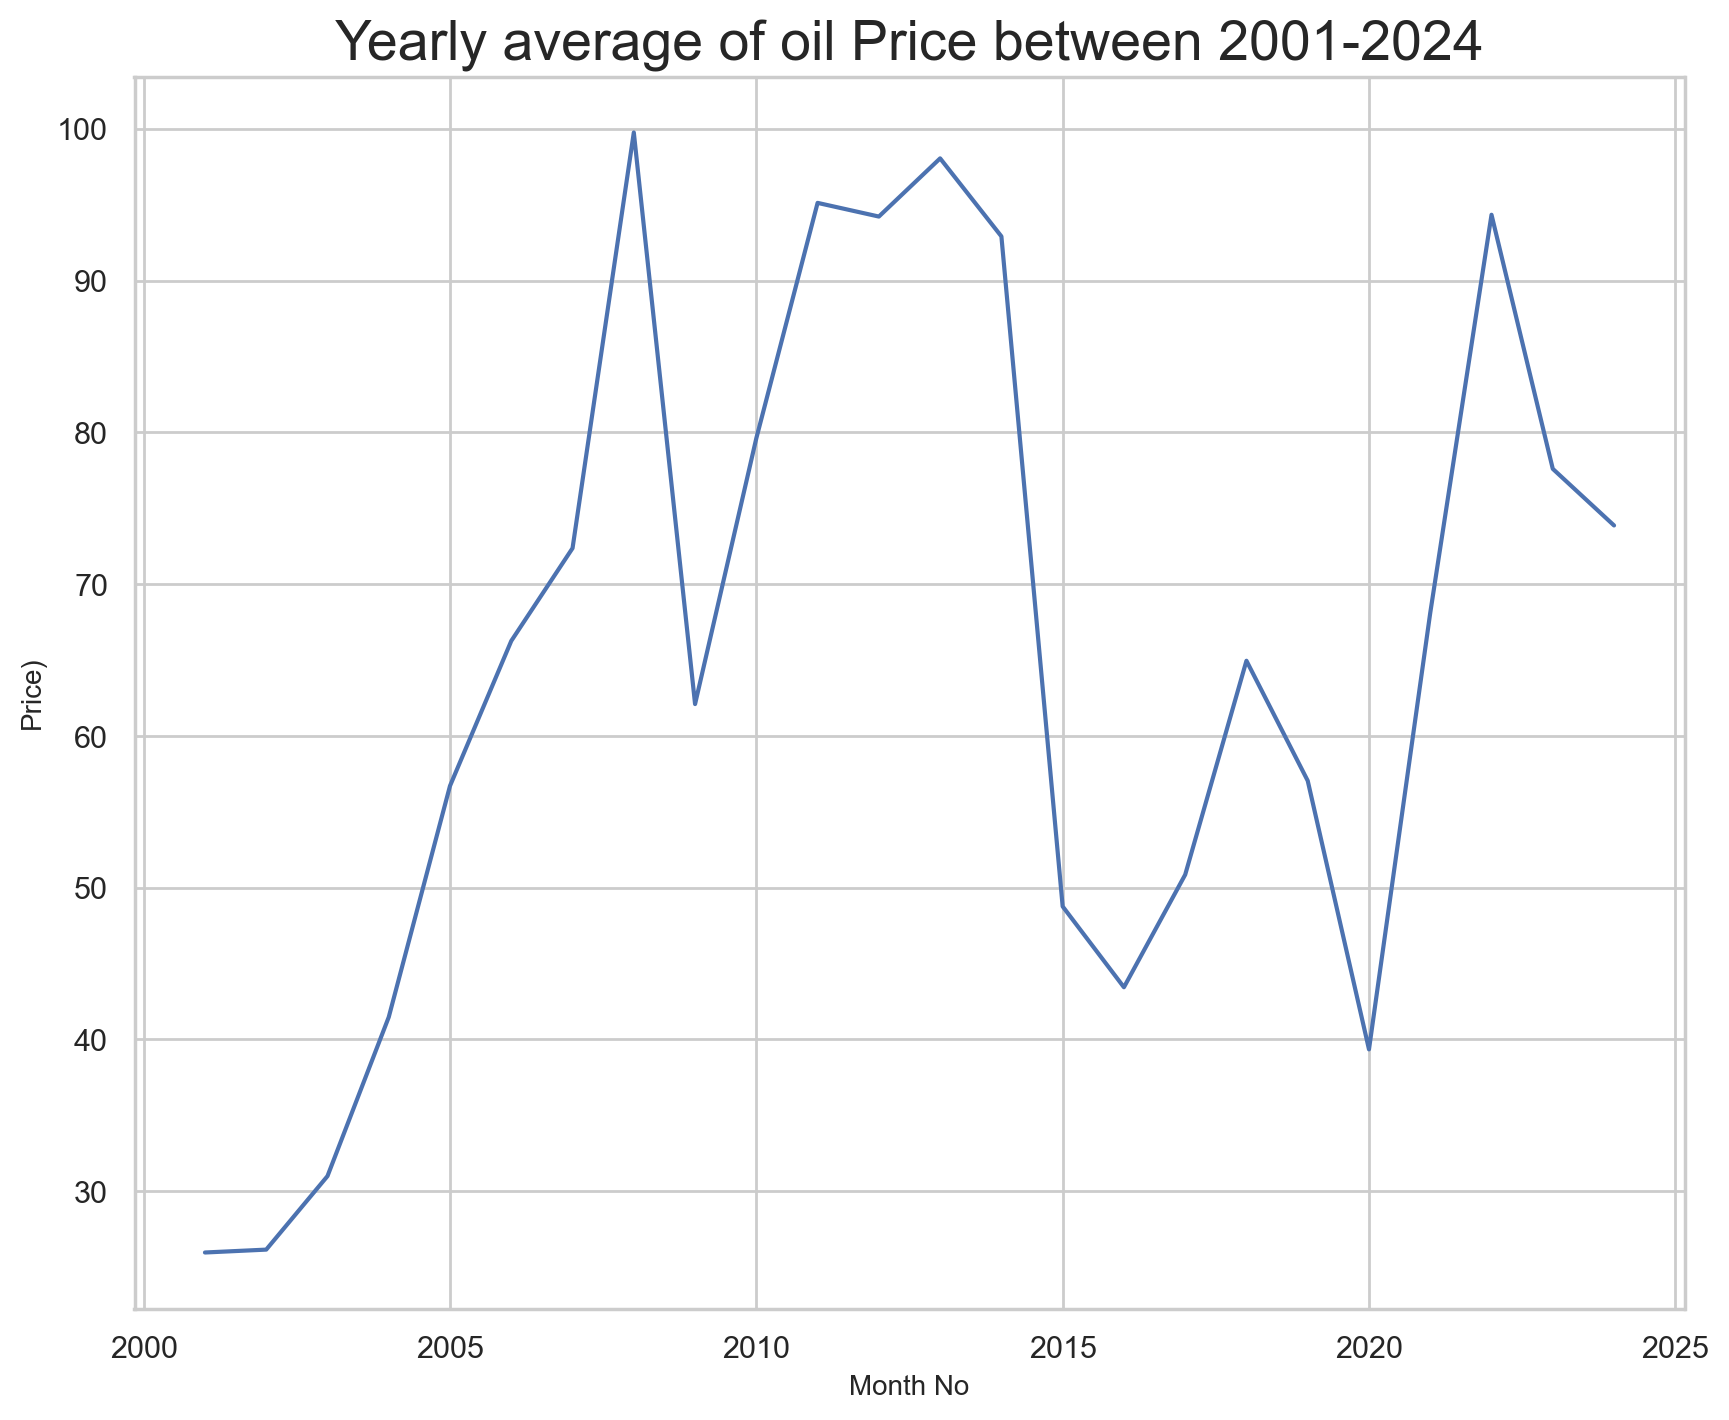

In [30]:
# Grouping by Years and plotting the mean
plt.plot(oil.groupby('year')['Price'].mean())
plt.title("Yearly average of oil Price between 2001-2024",fontsize=20)
plt.xlabel("Month No", fontsize=10)
plt.ylabel("Price)",fontsize=10)

In [26]:
pivot_year=oil.pivot_table(values='Price',columns=['year'],aggfunc=np.mean)
pivot_year

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Price,25.960405,26.15044,30.9944,41.469076,56.704502,66.25456,72.364524,99.751541,62.094088,79.609881,...,48.761349,43.4358,50.853267,64.94745,57.041825,39.344269,68.106032,94.331474,77.592152,73.860952


<Axes: >

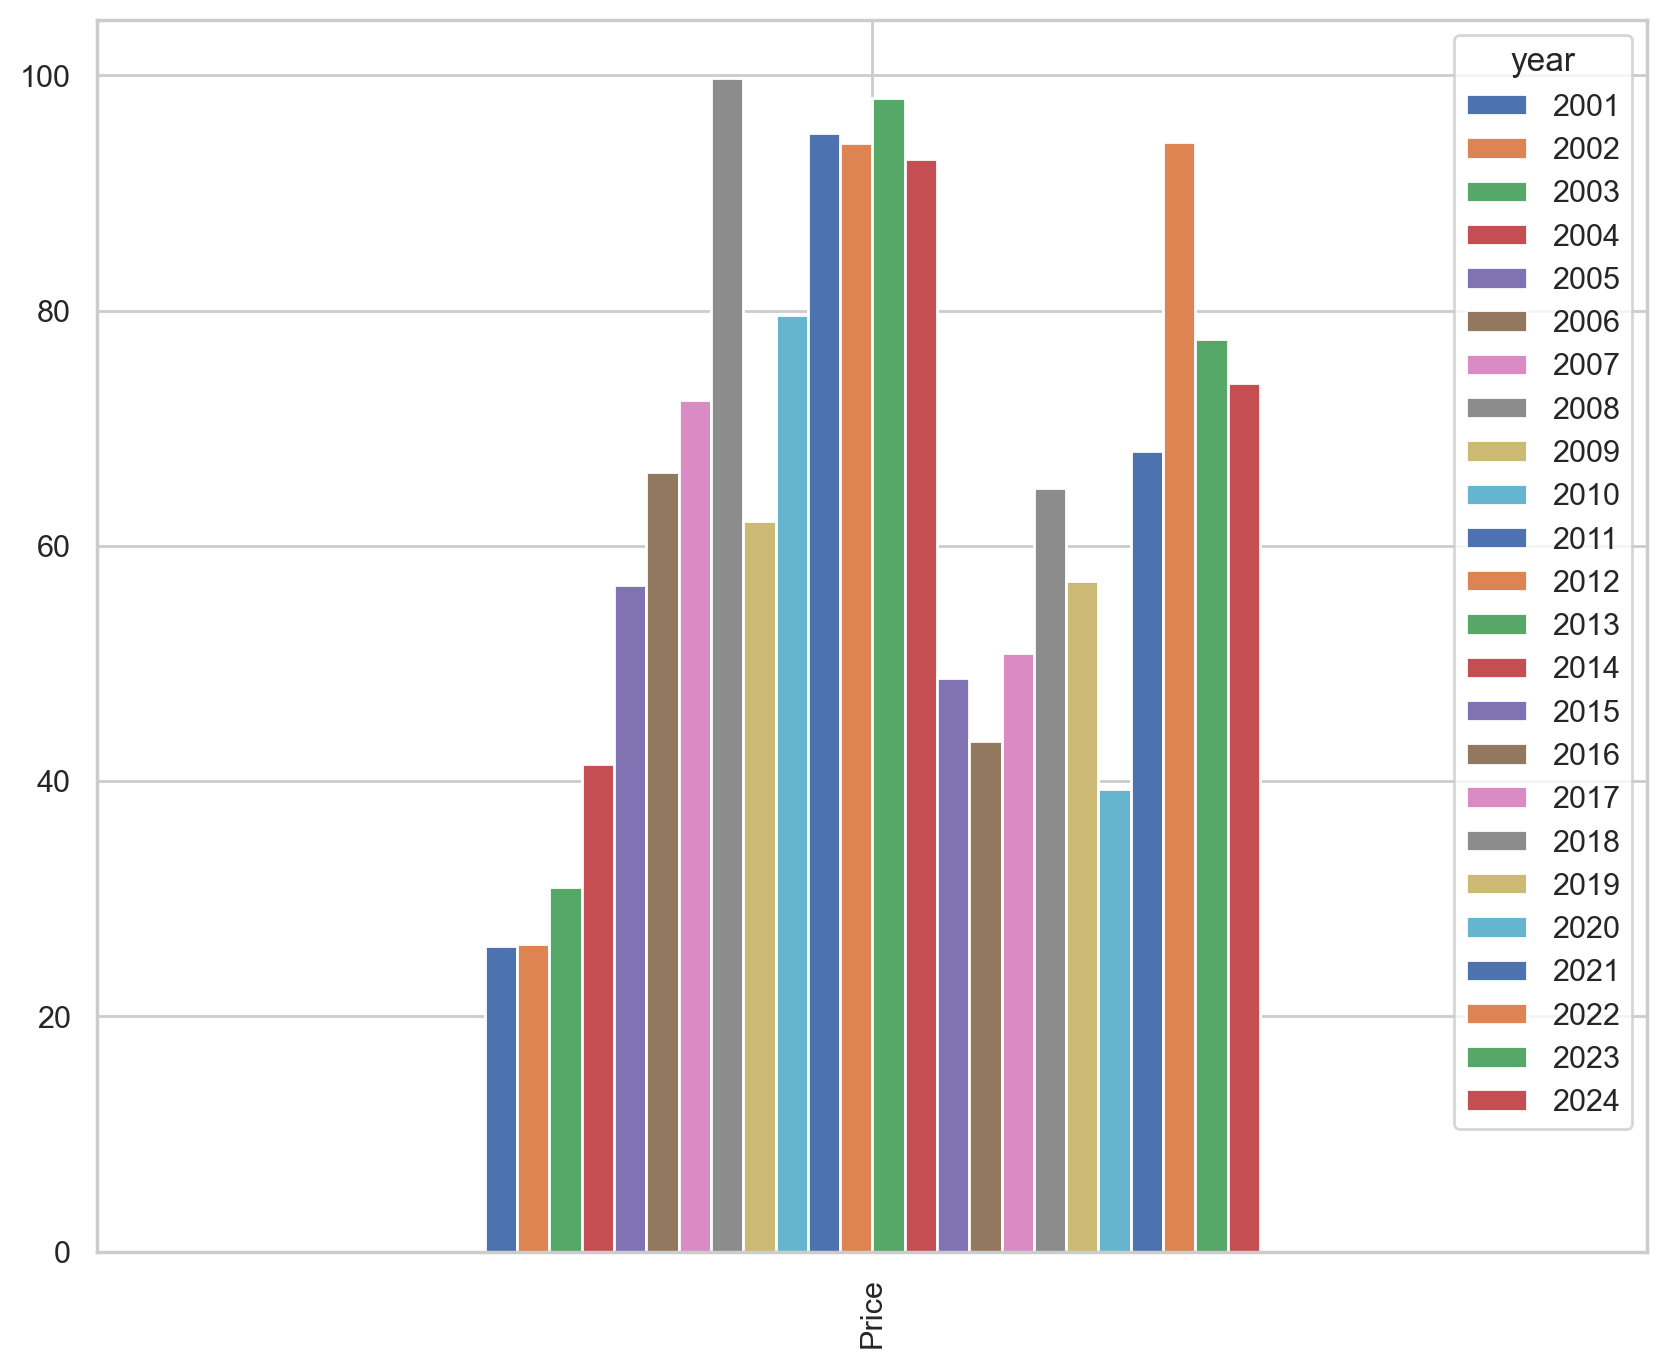

In [27]:
pivot_year.plot(kind='bar')